In [1]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('laptop_data.csv')
df = df.iloc[:, 1:]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 11)

In [4]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
def get_ram(df, column):
    df[column] = df[column].str.replace('GB', '')
    df[column] = df[column].apply(lambda x : int(x))

def get_weight(df, column):
    df[column] = df[column].str.replace('kg', '')
    df[column] = df[column].apply(lambda x : float(x))

get_ram(df, 'Ram')
get_weight(df, 'Weight')

In [6]:
df.head(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000


In [7]:
df.TypeName.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

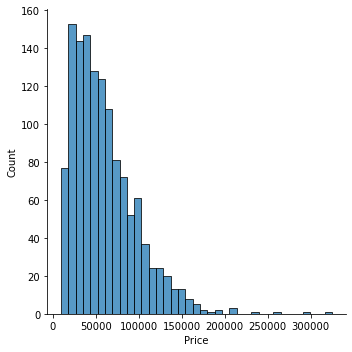

In [8]:
seaborn.displot(df['Price'])

#### As we can see, our data is skewed

{'Dell': 297, 'Lenovo': 297, 'HP': 274, 'Asus': 158, 'Acer': 103, 'MSI': 54, 'Toshiba': 48, 'Apple': 21, 'Samsung': 9, 'Razer': 7, 'Mediacom': 7, 'Microsoft': 6, 'Xiaomi': 4, 'Vero': 4, 'Chuwi': 3, 'Google': 3, 'Fujitsu': 3, 'LG': 3, 'Huawei': 2}


<AxesSubplot:xlabel='Company'>

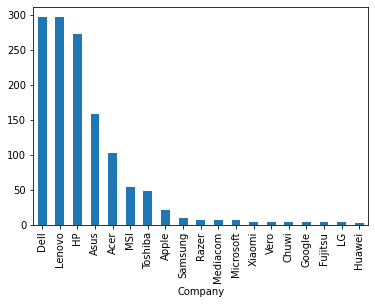

In [9]:
print(dict(df['Company'].value_counts()))
df['Company'].value_counts().plot(kind = 'bar')

In [10]:
round(df.groupby('Company')['Price'].mean().sort_values())

Company
Vero          11584.0
Mediacom      15718.0
Chuwi         16746.0
Acer          33395.0
Fujitsu       38841.0
HP            56891.0
Lenovo        57883.0
Asus          58830.0
Xiaomi        60391.0
Dell          63194.0
Toshiba       67549.0
Samsung       75308.0
Huawei        75871.0
Apple         83340.0
Microsoft     85904.0
Google        89386.0
MSI           92116.0
LG           111835.0
Razer        178282.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='Company'>

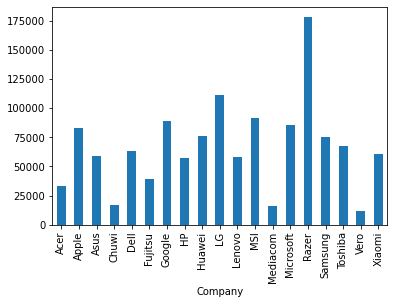

In [11]:
df.groupby('Company')['Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='TypeName'>

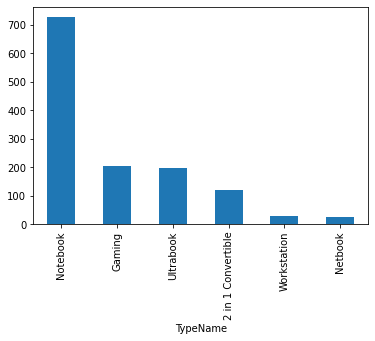

In [12]:
df['TypeName'].value_counts().plot(kind = 'bar')

In [13]:
round(df.groupby('TypeName')['Price'].mean().sort_values())

TypeName
Netbook                33898.0
Notebook               41669.0
2 in 1 Convertible     68326.0
Ultrabook              82490.0
Gaming                 92248.0
Workstation           121498.0
Name: Price, dtype: float64

<AxesSubplot:xlabel='TypeName'>

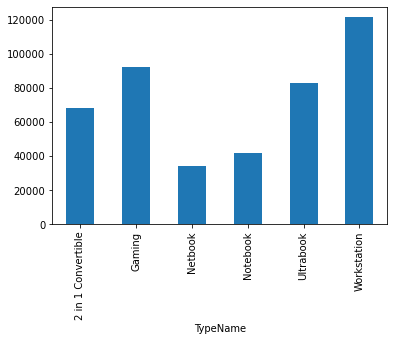

In [14]:
df.groupby('TypeName')['Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Inches'>

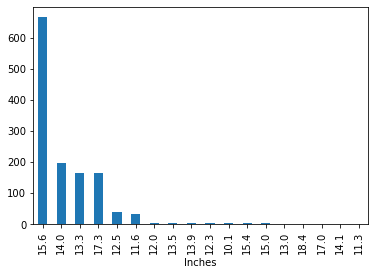

In [15]:
df.Inches.value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Inches'>

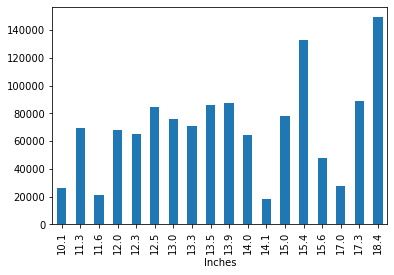

In [16]:
df.groupby('Inches')['Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Inches', ylabel='Price'>

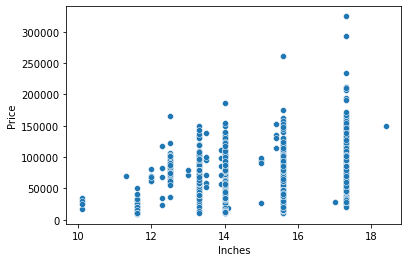

In [17]:
seaborn.scatterplot(x = df['Inches'], y = df['Price'])

In [18]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [19]:
df['Resolution'] = df.ScreenResolution.apply(lambda x : x.split(' ')[-1])

<AxesSubplot:xlabel='TouchScreen'>

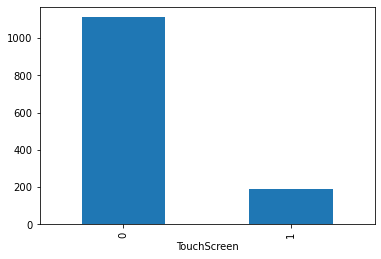

In [20]:
df['TouchScreen'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

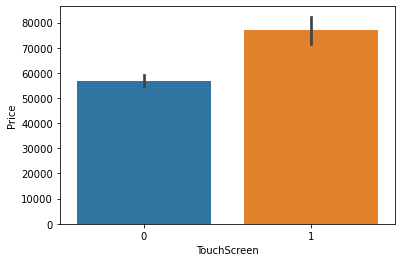

In [21]:
seaborn.barplot(x = df['TouchScreen'], y = df['Price'])

<AxesSubplot:xlabel='Resolution'>

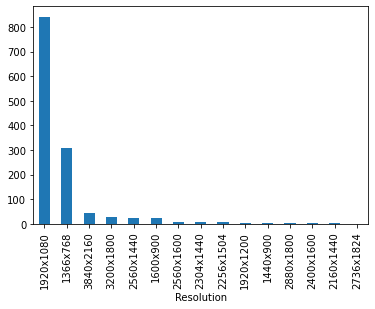

In [22]:
df['Resolution'].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='Resolution'>

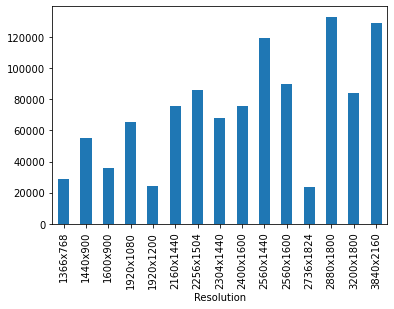

In [23]:
df.groupby('Resolution')['Price'].mean().plot(kind = 'bar')

In [24]:
df['x_resolution'] = df['Resolution'].str.split('x', n=1, expand=True)[0]
df['y_resolution'] = df['Resolution'].str.split('x', n=1, expand=True)[1]

In [27]:
df['x_resolution'] = df['x_resolution'].astype('int')
df['y_resolution'] = df['y_resolution'].astype('int')

In [29]:
df['ppi'] = (((df['x_resolution']**2) + (df['y_resolution']**2))**0.5/df['Inches']).astype('float')

In [38]:
df.drop(['ScreenResolution', 'x_resolution', 'y_resolution', 'Inches'], inplace = True, axis=1)

In [46]:
df['Processor'] = df.Cpu.apply(lambda x : ' '.join(x.split()[0:3]))

In [48]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [49]:
df['Cpu brand'] = df['Processor'].apply(fetch_processor)

<AxesSubplot:xlabel='Cpu brand'>

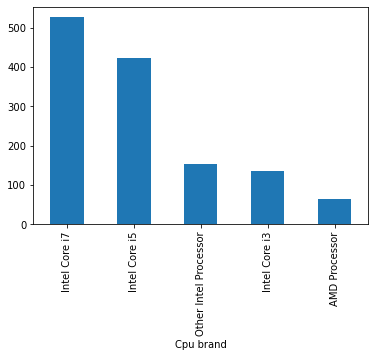

In [50]:
df['Cpu brand'].value_counts().plot(kind='bar')

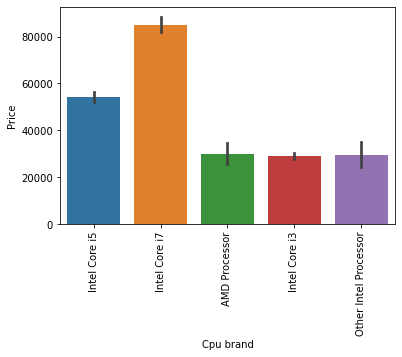

In [52]:
seaborn.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df.drop(columns=['Cpu','Processor'],inplace=True)

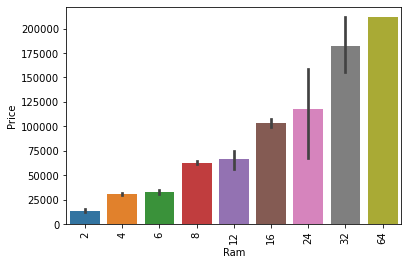

In [54]:
seaborn.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df["Memory"].str.replace('GB', '')
df['Memory'] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

In [88]:
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

In [90]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [94]:
df.drop(['Hybrid', 'Flash_Storage'], inplace=True, axis=1)

In [96]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [97]:
df = df[df['Gpu brand'] != 'ARM']

In [98]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

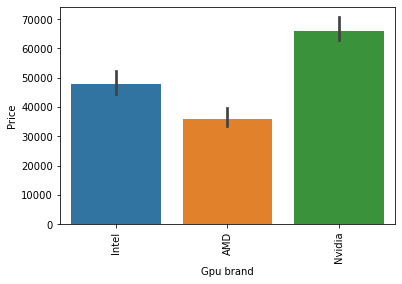

In [100]:
seaborn.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
df.drop(columns=['Gpu'],inplace=True, axis=1)

In [102]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

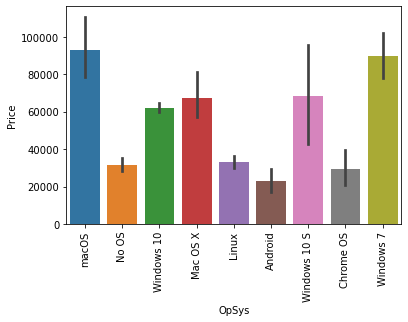

In [103]:
seaborn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [104]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [105]:
df['os'] = df['OpSys'].apply(cat_os)

In [106]:
df.drop(columns=['OpSys'],inplace=True, axis=1)

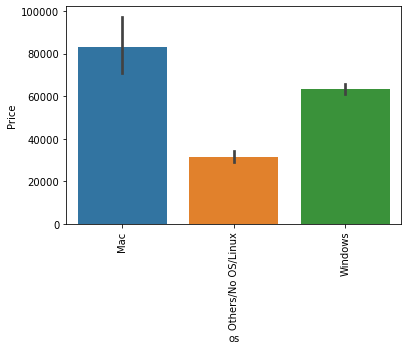

In [107]:
seaborn.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

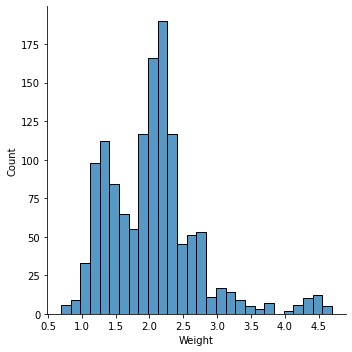

In [114]:
seaborn.displot(df['Weight'])

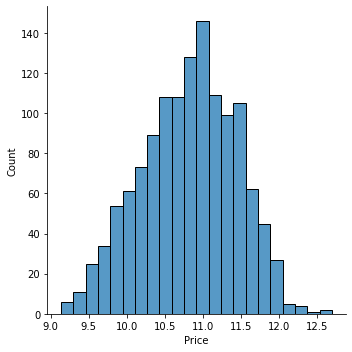

In [116]:
seaborn.displot(np.log(df['Price']))

In [130]:
X = df.drop(columns=['Price', 'Memory', 'Resolution'])
y = np.log(df['Price'])

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [132]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [133]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [134]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [136]:
X_train.head(1)

,Company,TypeName,Ram,Weight,TouchScreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.0,0,100.45467,Intel Core i5,0,128,Intel,Windows


In [137]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/pratik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8074868008079447
MAE 0.21019992597663675


In [139]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,6,9,10])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/home/pratik/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8850912070674749
MAE 0.1613352924804768


In [146]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))